In [160]:
##Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
##Reading the dataset 

data = pd.read_csv('https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [162]:
##Checking the shape of the dataset
data.shape

(569, 33)

In [163]:
##Data Description
data.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [164]:
##Changing target variables
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

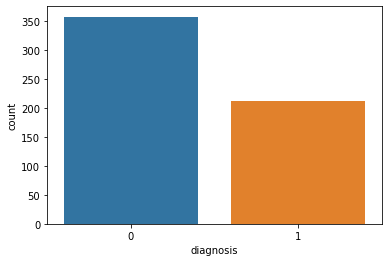

In [165]:
##Look at the distribution of target variable
import seaborn as sns

sns.countplot(data['diagnosis'])

In [166]:
##Dropping two columns 
data = data.drop(['Unnamed: 32','id'], axis = 1)

In [167]:
##Check column names
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [168]:
##Splitting train test split
import random
np.random.seed(42)

def train_test_split(data,test_size):
    np.random.seed(42)
    if isinstance(test_size,float):
        test_size = round(test_size*len(data))
    indices = data.index.tolist()
    test_indices = random.sample(population = indices, k=test_size)
    test_data = data.loc[test_indices]
    train_data = data.drop(test_indices)
    
    return train_data,test_data


In [169]:
train, test = train_test_split(data,0.3)

print("Train Dataset Shape",train.shape)
print("Test Dataset Shape",test.shape)


Train Dataset Shape (398, 31)
Test Dataset Shape (171, 31)


In [170]:
# X_train = np.array(train.drop['diagnosis', axis = 1))
X_train = train.drop(['diagnosis'], axis = 1)
y_train = train['diagnosis']

X_test = test.drop(['diagnosis'],axis = 1)
y_test = test['diagnosis']


print("Train Dataset Shape",np.shape(X_train))
print("Test Dataset Shape",np.shape(X_test))
print("Train Dataset Shape",np.shape(y_train))
print("Test Dataset Shape",np.shape(y_test))

X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

print("---Shape of Dataset after adding--")
print("Train Dataset Shape",np.shape(X_train))
print("Test Dataset Shape",np.shape(X_test))
print("Train Dataset Shape",np.shape(y_train))
print("Test Dataset Shape",np.shape(y_test))




Train Dataset Shape (398, 30)
Test Dataset Shape (171, 30)
Train Dataset Shape (398,)
Test Dataset Shape (171,)
---Shape of Dataset after adding--
Train Dataset Shape (398, 31)
Test Dataset Shape (171, 31)
Train Dataset Shape (398,)
Test Dataset Shape (171,)


In [171]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [172]:
def sigmoid(z): 
    return 1/(1 + np.exp(-z))

In [173]:
def cost_function(X, y, theta):
    m = len(y)
    epsilon = 1e-5
    h = sigmoid(np.dot(X, theta))
    cost = (y * np.log(h+epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return -cost.mean()

In [174]:
def gradient_descent(X, y, B, alpha=0.05,iterations=250):
    cost_history = np.zeros(shape=(iterations, 1))
    N = len(X)                 
    
    for iteration in range(iterations):
        h = sigmoid(np.dot(X, B))
        B -= alpha*np.dot(X.T,(h - y)) / N            
        cost = cost_function(X,y,B)
        cost_history[iteration] = cost 
    return B,cost_history

In [175]:
def predict(X,B,threshold=0.5):
    z = np.dot(X,B)
    return [1 if i>threshold else 0 for i in sigmoid(z)]

In [176]:
from numpy.random import rand
B = rand(X_train.shape[1])
alpha = 0.005
iter_ = 20000

In [177]:
newB, cost_hist = gradient_descent(X_train,y_train,B,alpha,iter_)

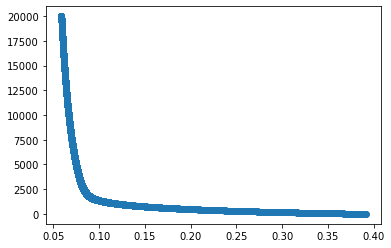

In [178]:
plt.scatter(cost_hist,range(iter_))
plt.show()

In [179]:
y_pred = predict(X_test,newB,)
len(y_pred)

171

In [180]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9883040935672515


In [181]:
score = float(sum(y_pred == y_test))/ float(len(y_test))
print(score)

0.9883040935672515
